In [89]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
#https://en.wikipedia.org/wiki/Vanishing_point

In [90]:
image = cv2.imread('./data/image.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

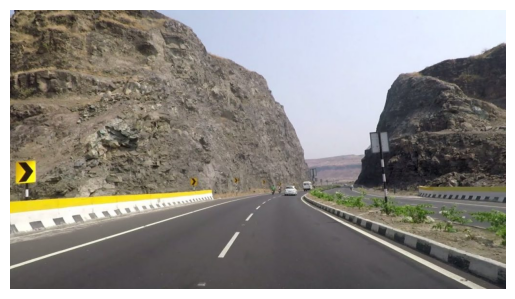

In [91]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [92]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [93]:
blurGray = cv2.GaussianBlur(gray, (5, 5), 1)
# Generating Edge image
edgeGray = cv2.Canny(blurGray, 40, 255)

# Finding Lines in the image
lines = cv2.HoughLinesP(edgeGray, 1, np.pi / 180, 50, 10, 15)
lines.shape

(25, 1, 4)

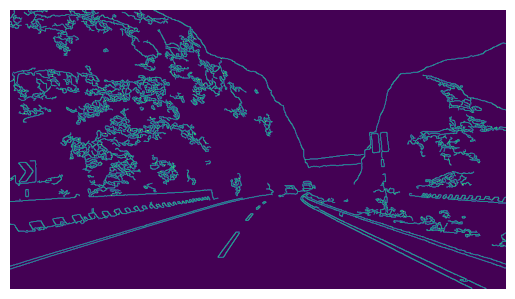

In [94]:
plt.imshow(edgeGray)
plt.axis('off')
plt.show()

In [95]:
_image = image.copy()
for Line in np.squeeze(lines):
            cv2.line(_image, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)

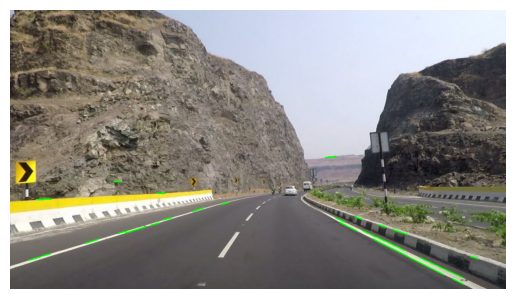

In [96]:
plt.imshow(_image)
plt.axis('off')
plt.show()

In [97]:
valid = []
for line in np.squeeze(lines):
    slope = (line[3] - line[1]) / (line[2] - line[0])
    if abs(slope)*57.3 > 10 and abs(slope)*57.3 < 80:
        valid.append(line)

In [98]:
_image = image.copy()
for Line in valid:
            cv2.line(_image, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)

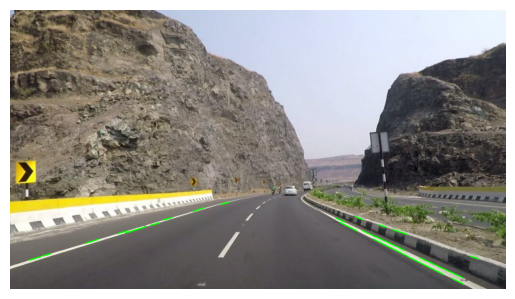

In [99]:
plt.imshow(_image)
plt.axis('off')
plt.show()

In [100]:
def find_intersection(line1, line2):
    x1, y1 = line1[0], line1[1]
    x2, y2 = line1[2], line1[3]
    x3, y3 = line2[0], line2[1]
    x4, y4 = line2[2], line2[3]

    A1 = y2 - y1
    B1 = x1 - x2
    C1 = x1 * (y1 - y2) - y1 * (x1 - x2)

    A2 = y4 - y3
    B2 = x3 - x4
    C2 = x3 * (y3 - y4) - y3 * (x3 - x4)

    denom = A1 * B2 - A2 * B1

    if denom != 0:
        x = (C1 * B2 - C2 * B1) / denom
        y = (C2 * A1 - C1 * A2) / denom
        return int(x), int(y)
    else:
        return None

In [101]:
print(find_intersection(valid[0], valid[9]))

(-801, -489)


In [102]:
def find_vp(lines):
    n = len(lines)
    sum_x = 0
    sum_y = 0

    for i in range(n - 1):
        for j in range(i+1, n):
            intersect = find_intersection(lines[i], lines[j])
            if intersect is not None:
                sum_x += intersect[0]
                sum_y += intersect[1]
    
    if n > 0:
        return int(sum_x / n), int(sum_y / n)
    else:
        return None

In [103]:
vp = find_vp(valid)
vp

(-5327, -3886)

In [104]:
if vp is not None:
    cv2.circle(_image, (vp[0], vp[1]), 100, (255, 0, 0), 3)

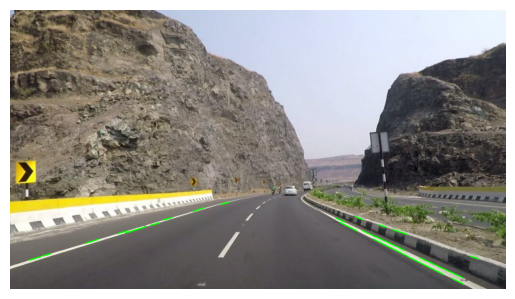

In [105]:
plt.imshow(_image)
plt.axis('off')
plt.show()

In [106]:
_image.shape

(576, 1024, 3)